In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## chat gpt

In [ ]:
!pip install openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 14.8 MB/s eta 0:00:00


In [ ]:
import os
import openai

openai.api_key = "xxx"

openai.ChatCompletion.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "user", "content": "Hello ChatGPT, does this work?"}
  ]
  )

<OpenAIObject chat.completion id=chatcmpl-7O6463OzHHe2YOrydWTlojtQp4pMm at 0x7f2255d8d3f0> JSON: {
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "message": {
        "content": "I'm sorry, I'm an AI language model and I don't have enough information to determine what you are referring to. Can you please clarify your question or provide more context?",
        "role": "assistant"
      }
    }
  ],
  "created": 1685977542,
  "id": "chatcmpl-7O6463OzHHe2YOrydWTlojtQp4pMm",
  "model": "gpt-3.5-turbo-0301",
  "object": "chat.completion",
  "usage": {
    "completion_tokens": 36,
    "prompt_tokens": 17,
    "total_tokens": 53
  }
}

In [ ]:
DATA_PATH = "/content/drive/MyDrive/UCSD/classes/sp23/dsc253-adv-text-mining/project/exam-hw-questions/question dataset from outside and our owns/boolq_from_huggingface.csv"
import pandas as pd
df = pd.read_csv(DATA_PATH)

In [ ]:
df.head(5)

,Unnamed: 0,question,answer,passage
0,0,do iran and afghanistan speak the same language,True,"Persian (/ˈpɜːrʒən, -ʃən/), also known by its ..."
1,1,do good samaritan laws protect those who help ...,True,Good Samaritan laws offer legal protection to ...
2,2,is windows movie maker part of windows essentials,True,Windows Movie Maker (formerly known as Windows...
3,3,is confectionary sugar the same as powdered sugar,True,"Powdered sugar, also called confectioners' sug..."
4,4,is elder scrolls online the same as skyrim,False,As with other games in The Elder Scrolls serie...


In [ ]:
import random

i = (random.randint(0, len(df)))

question = df.question[i]
passage = df.passage[i]
gt = df.answer[i]

full_content_without_passage = question + ". True or False, give one word answer"
full_content_with_passage = passage + " " + question + ". True or False, give one word answer"
print(full_content_without_passage)
print(full_content_with_passage)


ans_no_passage = openai.ChatCompletion.create(model="gpt-3.5-turbo",messages=[{"role": "user", "content": full_content_without_passage}]) ['choices'][0]['message']['content']

ans_with_passage = openai.ChatCompletion.create(model="gpt-3.5-turbo",messages=[{"role": "user", "content": full_content_with_passage}]) ['choices'][0]['message']['content']
# ans_with_passage = openai.ChatCompletion.create(model="gpt-3.5-turbo",messages=[{"role": "user", "content": passage + question + "True or False, give one word answer"}])['choices'][0]['message']['content']


print("no passage \t" +  ans_no_passage)
print("with passage \t" +  ans_with_passage)
print("ground truth \t" + str(gt))


are casualty and holby city set in the same hospital. True or False, give one word answer
The series was created by Tony McHale and Mal Young as a spin-off from the established BBC medical drama Casualty, and premiered on 12 January 1999. It is set in the same hospital as Casualty, in the fictional city of Holby, and featured occasional crossovers of characters and plots with both Casualty (which featured dedicated episodes broadcast as Casualty@Holby City) and the show's 2007 police procedural spin-off HolbyBlue. Its first executive producers were Young and Johnathan Young, who were succeeded by Kathleen Hutchison from 2002 to 2004, Richard Stokes from 2004 to 2006, McHale from 2006 to 2010, Belinda Campbell from 2010 to 2011, Johnathan Young from 2011 to 2013, Oliver Kent from 2013 to 2017 and Simon Harper from 2017. Since the show's initial development, it has become a weekly fixture in the schedule. Holby City airs once a week, all year round, and each series now contains 52 episod

### experiments

In [ ]:
def generate_ans(question, passage, 
                 use_passage = False, 
                 add_unk = False,
                 add_unk_front = False, 
                 add_unk_back = False,
                 swap_true_false = False,
                 cot = False):

  if use_passage:
    full_content = passage + " " + question 
  else:
    full_content = question 

  if add_unk:
    if add_unk_front:
      full_content = "unknown" + " " + full_content
    elif add_unk_back:
      full_content = full_content + " " + "unknown" 

  if cot:
    full_content += ". Let's think step by step"

  if swap_true_false:
    full_content += ". False or True, give one word answer"
  else:
    full_content += ". True or False, give one word answer"

  ans = openai.ChatCompletion.create(model="gpt-3.5-turbo",messages=[{"role": "user", "content": full_content}])['choices'][0]['message']['content']
  
  if "true" in ans.lower():
    ans = "True"
  elif "false" in ans.lower():
    ans = "False"

  print(full_content)
  # print(ans)
  return ans

question = df_subset.question.iloc[10]
passage = df_subset.passage.iloc[10]

# print('no passage')
# generate_ans(question, passage, use_passage = False, add_unk = False, add_unk_front = False, add_unk_back = False, swap_true_false = False)
# print('with passage')
# generate_ans(question, passage, use_passage = True, add_unk = False, add_unk_front = False, add_unk_back = False, swap_true_false = False)
# print('add unknow front passage')
# generate_ans(question, passage, use_passage = False, add_unk = True, add_unk_front = True, add_unk_back = False, swap_true_false = False)
# print('add unknow back passage')
# generate_ans(question, passage, use_passage = False, add_unk = True, add_unk_front = False, add_unk_back = True, swap_true_false = False)
# print('swap true false')
# generate_ans(question, passage, use_passage = False, add_unk = False, add_unk_front = False, add_unk_back = False, swap_true_false = True)
print('chain of thoughts')
generate_ans(question, passage, use_passage = False, add_unk = False, add_unk_front = False, add_unk_back = False, swap_true_false = False, cot = True)

chain of thoughts
is a wolverine the same as a badger. Let's think step by step. True or False, give one word answer


'False'

In [ ]:
sample_size = 300
df_subset = df[:sample_size]
len(df_subset)

300

In [ ]:
pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tqdm

In [ ]:
df_subset_1 = df_subset

In [ ]:
sample_size = 50
df_subset = df[100:(100 + sample_size)]
df_subset.question.iloc[0]

'would a person sink in a corn silo'

In [ ]:
 pd.DataFrame(ans_without_passage_list, )

In [ ]:

sample_size = 300
start_index = 0
df_subset = df[start_index:(start_index + sample_size)].reset_index()
ans_without_passage_list = [""] * sample_size
ans_with_passage_list = [""] * sample_size
ans_unk_front_list =  [""] * sample_size
ans_unk_back_list = [""] * sample_size
swap_tf_list = [""] * sample_size
cot_list = [""] * sample_size

In [ ]:
from tqdm import tqdm


iterable = range(sample_size)

# Wrap your iterable with tqdm to create a progress bar
for i in tqdm(iterable):
# for i in range(len(df_subset)):
  question = df_subset.question.iloc[i]
  passage = df_subset.passage.iloc[i]
  ground_truth = df_subset.answer.iloc[i] 

  # ans_without_passage_list[i] = generate_ans(question, passage)
  # ans_with_passage_list[i] = generate_ans(question, passage, use_passage = True)
  # ans_unk_front_list[i] = generate_ans(question, passage, add_unk = True, add_unk_front = True)
  # ans_unk_back_list[i] = generate_ans(question, passage, add_unk = True, add_unk_back = True)
  # swap_tf_list[i] = generate_ans(question, passage, swap_true_false = True)
  cot_list[i] = generate_ans(question, passage, cot = True)


# df_subset['no_passage'] = pd.DataFrame(ans_without_passage_list)
# df_subset['with_passage'] = pd.DataFrame(ans_with_passage_list)
# df_subset['add_unk_front'] = pd.DataFrame(ans_unk_front_list)
# df_subset['add_unk_back'] = pd.DataFrame(ans_unk_back_list)
# df_subset['swap_tf'] = pd.DataFrame(swap_tf_list)
df_subset['cot'] = pd.DataFrame(cot_list)
df_subset


100%|██████████| 300/300 [04:15<00:00,  1.17it/s]


,index,Unnamed: 0,question,answer,passage,cot
0,0,0,do iran and afghanistan speak the same language,True,"Persian (/ˈpɜːrʒən, -ʃən/), also known by its ...",False
1,1,1,do good samaritan laws protect those who help ...,True,Good Samaritan laws offer legal protection to ...,True
2,2,2,is windows movie maker part of windows essentials,True,Windows Movie Maker (formerly known as Windows...,True
3,3,3,is confectionary sugar the same as powdered sugar,True,"Powdered sugar, also called confectioners' sug...",True
4,4,4,is elder scrolls online the same as skyrim,False,As with other games in The Elder Scrolls serie...,False
...,...,...,...,...,...,...
295,295,295,is transit aba number the same as routing number,True,An ABA routing transit number (ABA RTN) is a n...,False
296,296,296,is hashtag the same as the number sign,True,"Since 2007, widespread usage of the symbol to ...",True
297,297,297,does the f train stop at queens plaza,False,Queens Plaza is an express station on the IND ...,True
298,298,298,is there a difference between slugs and snails,True,Snail is a common name loosely applied to shel...,True


In [ ]:
print('Accuracy using chain of thought: \t\t', (df_subset.answer.astype(str)  == df_subset.cot).mean())

Accuracy using chain of thought: 		 0.7033333333333334


In [ ]:
df_startwithindex250 = df_subset

In [ ]:
df_startwithindex200 = df_subset

In [ ]:
df_startwithindex150 = df_subset

In [ ]:
df_startwithindex100 = df_subset

In [ ]:
df_startwithindex50 = df_subset

In [ ]:
df_startwithindex0 = df_subset
df_startwithindex0

In [ ]:
combined_df = pd.concat([df_startwithindex0, df_startwithindex50, df_startwithindex100,
                         df_startwithindex150, df_startwithindex200, df_startwithindex250], ignore_index=True)
combined_df

,index,Unnamed: 0,question,answer,passage,swap_tf,no_passage,with_passage,add_unk_front,add_unk_back
0,0,0,do iran and afghanistan speak the same language,True,"Persian (/ˈpɜːrʒən, -ʃən/), also known by its ...",False,False,False,False,False
1,1,1,do good samaritan laws protect those who help ...,True,Good Samaritan laws offer legal protection to ...,True,True,True,True,True
2,2,2,is windows movie maker part of windows essentials,True,Windows Movie Maker (formerly known as Windows...,True,True,True,True,True
3,3,3,is confectionary sugar the same as powdered sugar,True,"Powdered sugar, also called confectioners' sug...",True,True,True,True,True
4,4,4,is elder scrolls online the same as skyrim,False,As with other games in The Elder Scrolls serie...,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
295,295,295,is transit aba number the same as routing number,True,An ABA routing transit number (ABA RTN) is a n...,False,False,True,False,False
296,296,296,is hashtag the same as the number sign,True,"Since 2007, widespread usage of the symbol to ...",True,True,True,True,True
297,297,297,does the f train stop at queens plaza,False,Queens Plaza is an express station on the IND ...,True,True,False,True,True
298,298,298,is there a difference between slugs and snails,True,Snail is a common name loosely applied to shel...,True,True,True,True,True


In [ ]:
df_subset = combined_df

print('Accuracy without using passage: \t', (df_subset.answer.astype(str) == df_subset.no_passage).mean())
print('Accuracy using passage: \t\t', (df_subset.answer.astype(str)  == df_subset.with_passage).mean())
print('Accuracy add unknown front: \t\t', (df_subset.answer.astype(str)  == df_subset.add_unk_front).mean())
print('Accuracy add unknown back: \t\t', (df_subset.answer.astype(str)  == df_subset.add_unk_back).mean())
print('Accuracy swap true false: \t\t', (df_subset.answer.astype(str)  == df_subset.swap_tf).mean())

print("==================================================================================================")
print('Percentage of True ground truth label:  \t', (df_subset.answer.astype(str) == "True").mean())
print('Percentage of False ground truth label:  \t', (df_subset.answer.astype(str) == "False").mean())

print('Percentage of True predicted label: \t\t', (df_subset.swap_tf == "True").mean())
print('Percentage of False predicted predicted:  \t', (df_subset.swap_tf == "False").mean())

Accuracy without using passage: 	 0.71
Accuracy using passage: 		 0.8466666666666667
Accuracy add unknown front: 		 0.7233333333333334
Accuracy add unknown back: 		 0.55
Accuracy swap true false: 		 0.7366666666666667
Percentage of True ground truth label:  	 0.62
Percentage of False ground truth label:  	 0.38
Percentage of True predicted label: 		 0.59
Percentage of False predicted predicted:  	 0.4066666666666667


In [ ]:
df_subset['answer'] = df_subset.answer.astype(str)

### add unk front

In [ ]:
# add unk front
df_subset = df[:sample_size]
ans_unk_list = [""] * len(df_subset)

for i in range(len(df_subset)):
  question = df_subset.question[i]
  passage = df_subset.passage[i]

  ans_unk_list[i] = generate_ans(question, passage, add_unk = True)



<ipython-input-15-bb580505168b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['add_unk'] = pd.DataFrame(ans_unk_list)


In [ ]:
ans_unk_front_list = ans_unk_list

In [ ]:
df_subset['no_passage'] = pd.DataFrame(ans_without_passage_list)
df_subset['with_passage'] = pd.DataFrame(ans_with_passage_list)
df_subset['add_unk_front'] = pd.DataFrame(ans_unk_list)

In [ ]:
df_subset

In [ ]:
print('Accuracy without using passage: \t', (df_subset.answer.astype(str) == df_subset.no_passage).mean())
print('Accuracy using passage: \t\t', (df_subset.answer.astype(str)  == df_subset.with_passage).mean())
print('Accuracy add unknown: \t\t\t', (df_subset.answer.astype(str)  == df_subset.add_unk).mean())

Accuracy without using passage: 	 0.74
Accuracy using passage: 		 0.84
Accuracy add unknown: 			 0.66


adding "unknown" to prompt hurts the performance

In [ ]:
df_subset

,Unnamed: 0,question,answer,passage,add_unk,no_passage,with_passage
0,0,do iran and afghanistan speak the same language,True,"Persian (/ˈpɜːrʒən, -ʃən/), also known by its ...",False,False,False
1,1,do good samaritan laws protect those who help ...,True,Good Samaritan laws offer legal protection to ...,True,True,True
2,2,is windows movie maker part of windows essentials,True,Windows Movie Maker (formerly known as Windows...,True,True,True
3,3,is confectionary sugar the same as powdered sugar,True,"Powdered sugar, also called confectioners' sug...",True,True,True
4,4,is elder scrolls online the same as skyrim,False,As with other games in The Elder Scrolls serie...,False,False,False
5,5,can you use oyster card at epsom station,False,Epsom railway station serves the town of Epsom...,True,True,False
6,6,will there be a season 4 of da vinci's demons,False,The series premiered in the United States on S...,False,False,False
7,7,is the federal court the same as the supreme c...,False,The federal courts are composed of three level...,False,False,False
8,8,did abraham lincoln write the letter in saving...,True,"In the 1998 war film Saving Private Ryan, Gene...",False,False,True
9,9,is batman and robin a sequel to batman forever,True,With the box office success of Batman Forever ...,False,True,True


look at the unknown answer

In [ ]:
df_subset.passage[46]

"In December 2014, it was announced that Torment, the second installment in the Fallen book series, was in development. It is unknown whether the last two novels, Passion and Rapture, and the spin-off novel, Unforgiven, will be adapted as well. In 2017, producer Kevan Van Thompson asked the fans if they want an adaptation of ``Torment'', showing that the sequel still could be made."

In [ ]:
print('Accuracy without using passage: \t', (df_subset.answer.astype(str) == df_subset.no_passage).mean())
print('Accuracy using passage: \t', (df_subset.answer.astype(str)  == df_subset.with_passage).mean())

Accuracy without using passage: 	 0.7
Accuracy using passage: 	 0.9


In [ ]:
df_subset = df[:10]
df_subset

,Unnamed: 0,question,answer,passage
0,0,do iran and afghanistan speak the same language,True,"Persian (/ˈpɜːrʒən, -ʃən/), also known by its ..."
1,1,do good samaritan laws protect those who help ...,True,Good Samaritan laws offer legal protection to ...
2,2,is windows movie maker part of windows essentials,True,Windows Movie Maker (formerly known as Windows...
3,3,is confectionary sugar the same as powdered sugar,True,"Powdered sugar, also called confectioners' sug..."
4,4,is elder scrolls online the same as skyrim,False,As with other games in The Elder Scrolls serie...
5,5,can you use oyster card at epsom station,False,Epsom railway station serves the town of Epsom...
6,6,will there be a season 4 of da vinci's demons,False,The series premiered in the United States on S...
7,7,is the federal court the same as the supreme c...,False,The federal courts are composed of three level...
8,8,did abraham lincoln write the letter in saving...,True,"In the 1998 war film Saving Private Ryan, Gene..."
9,9,is batman and robin a sequel to batman forever,True,With the box office success of Batman Forever ...


In [ ]:
# add unk back
ans_unk_back_list = [""] * len(df_subset)

for i in range(len(df_subset)):
  question = df_subset.question[i]
  passage = df_subset.passage[i]

  ans_unk_back_list[i] = generate_ans(question, passage, add_unk = True, add_unk_back = True)

df_subset['add_unk_back'] = pd.DataFrame(ans_unk_back_list)



<ipython-input-24-62067d5d4b5f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['add_unk_back'] = pd.DataFrame(ans_unk_back_list)


In [ ]:
print('Accuracy without using passage: \t', (df_subset.answer.astype(str) == df_subset.no_passage).mean())
print('Accuracy using passage: \t\t', (df_subset.answer.astype(str)  == df_subset.with_passage).mean())
print('Accuracy add unknown front: \t\t', (df_subset.answer.astype(str)  == df_subset.add_unk).mean())
print('Accuracy add unknown back: \t\t', (df_subset.answer.astype(str)  == df_subset.add_unk_back).mean())

Accuracy without using passage: 	 0.74
Accuracy using passage: 		 0.84
Accuracy add unknown front: 		 0.66
Accuracy add unknown back: 		 0.5


In [ ]:
df_subset.head()

,Unnamed: 0,question,answer,passage,add_unk,no_passage,with_passage,add_unk_back
0,0,do iran and afghanistan speak the same language,True,"Persian (/ˈpɜːrʒən, -ʃən/), also known by its ...",False,False,False,False
1,1,do good samaritan laws protect those who help ...,True,Good Samaritan laws offer legal protection to ...,True,True,True,True
2,2,is windows movie maker part of windows essentials,True,Windows Movie Maker (formerly known as Windows...,True,True,True,True
3,3,is confectionary sugar the same as powdered sugar,True,"Powdered sugar, also called confectioners' sug...",True,True,True,True
4,4,is elder scrolls online the same as skyrim,False,As with other games in The Elder Scrolls serie...,False,False,False,False


### exp: swap true false

In [ ]:
# swap the order of true false when asking
swap_tf_list = [""] * len(df_subset)

for i in range(len(df_subset)):
  question = df_subset.question[i]
  passage = df_subset.passage[i]

  swap_tf_list[i] = generate_ans(question, passage, swap_true_false = True)

df_subset['swap_tf'] = pd.DataFrame(swap_tf_list)



<ipython-input-123-a06cd21973a0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['swap_tf'] = pd.DataFrame(swap_tf_list)


In [ ]:
print('Accuracy without using passage: \t', (df_subset.answer.astype(str) == df_subset.no_passage).mean())
print('Accuracy using passage: \t\t', (df_subset.answer.astype(str)  == df_subset.with_passage).mean())
print('Accuracy add unknown front: \t\t', (df_subset.answer.astype(str)  == df_subset.add_unk).mean())
print('Accuracy add unknown back: \t\t', (df_subset.answer.astype(str)  == df_subset.add_unk_back).mean())
print('Accuracy swap true false: \t\t', (df_subset.answer.astype(str)  == df_subset.swap_tf).mean())

print ("==================================================================================================")
print('Percentage of True ground truth label:  \t', (df_subset.answer.astype(str) == "True").mean())
print('Percentage of False ground truth label:  \t', (df_subset.answer.astype(str) == "False").mean())

print('Percentage of True predicted label: \t\t', (df_subset.swap_tf == "True").mean())
print('Percentage of False predicted predicted:  \t', (df_subset.swap_tf == "False").mean())

Accuracy without using passage: 	 0.74
Accuracy using passage: 		 0.84
Accuracy add unknown front: 		 0.66
Accuracy add unknown back: 		 0.5
Accuracy swap true false: 		 0.76
Percentage of True ground truth label:  	 0.58
Percentage of False ground truth label:  	 0.42
Percentage of True predicted label: 		 0.42
Percentage of False predicted predicted:  	 0.56


may need a larger sample size to give any conclusion for swapping true false

In [ ]:
df_subset

,index,Unnamed: 0,question,answer,passage,swap_tf,no_passage,with_passage,add_unk_front,add_unk_back
0,0,0,do iran and afghanistan speak the same language,True,"Persian (/ˈpɜːrʒən, -ʃən/), also known by its ...",False,False,False,False,False
1,1,1,do good samaritan laws protect those who help ...,True,Good Samaritan laws offer legal protection to ...,True,True,True,True,True
2,2,2,is windows movie maker part of windows essentials,True,Windows Movie Maker (formerly known as Windows...,True,True,True,True,True
3,3,3,is confectionary sugar the same as powdered sugar,True,"Powdered sugar, also called confectioners' sug...",True,True,True,True,True
4,4,4,is elder scrolls online the same as skyrim,False,As with other games in The Elder Scrolls serie...,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
95,95,95,the movie rudy based on a true story,True,Daniel Eugene ``Rudy'' Ruettiger (born August ...,True,True,True,True,False
96,96,96,is the movie the wall a true story,False,"On November 12, 2014, it was announced that Am...",False,False,False,False,False
97,97,97,is it legal to carry a gun in nyc,True,New York state law does not require a license ...,False,False,False,False,False
98,98,98,the former soviet union broke into separate st...,True,"The post-Soviet states, also collectively know...",True,True,True,True,True


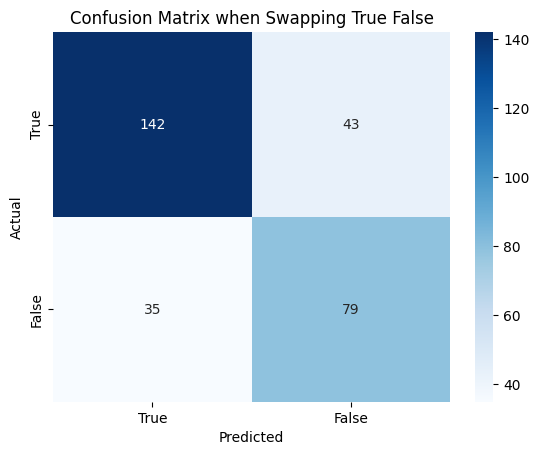

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
answer_list = df_subset.answer.tolist()
swap_tf_list = df_subset.swap_tf.tolist()

# Define the labels
labels = ["True", "False"]

# Compute the confusion matrix
cm = confusion_matrix(answer_list, swap_tf_list, labels=labels)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=labels, yticklabels=labels)

# Add labels and title to the plot
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix when Swapping True False')

# Display the plot
plt.show()


--> seems like swapping "False" first gives more False positive answer

In [ ]:
def highlight_greater(x):
    r = 'pink'
    g = 'lightgreen'
    df1 = pd.DataFrame('background-color: ', index=x.index, columns=x.columns)
    exclude_col = ['Unnamed: 0', 'question', 'answer', 'passage', 'index']
    for col in list(x.columns):
      if col not in exclude_col:
        m = x['answer'] ==  x[col]
        df1[col] = np.where(m, 'background-color: {}'.format(g), 'background-color: {}'.format(r))
    return df1


df_subset.style.apply(highlight_greater, axis=None)



,index,Unnamed: 0,question,answer,passage,swap_tf,no_passage,with_passage,add_unk_front,add_unk_back
0,0,0,do iran and afghanistan speak the same language,True,"Persian (/ˈpɜːrʒən, -ʃən/), also known by its endonym Farsi (فارسی fārsi (fɒːɾˈsiː) ( listen)), is one of the Western Iranian languages within the Indo-Iranian branch of the Indo-European language family. It is primarily spoken in Iran, Afghanistan (officially known as Dari since 1958), and Tajikistan (officially known as Tajiki since the Soviet era), and some other regions which historically were Persianate societies and considered part of Greater Iran. It is written in the Persian alphabet, a modified variant of the Arabic script, which itself evolved from the Aramaic alphabet.",False,False,False,False,False
1,1,1,do good samaritan laws protect those who help at an accident,True,"Good Samaritan laws offer legal protection to people who give reasonable assistance to those who are, or who they believe to be, injured, ill, in peril, or otherwise incapacitated. The protection is intended to reduce bystanders' hesitation to assist, for fear of being sued or prosecuted for unintentional injury or wrongful death. An example of such a law in common-law areas of Canada: a good Samaritan doctrine is a legal principle that prevents a rescuer who has voluntarily helped a victim in distress from being successfully sued for wrongdoing. Its purpose is to keep people from being reluctant to help a stranger in need for fear of legal repercussions should they make some mistake in treatment. By contrast, a duty to rescue law requires people to offer assistance and holds those who fail to do so liable.",True,True,True,True,True
2,2,2,is windows movie maker part of windows essentials,True,"Windows Movie Maker (formerly known as Windows Live Movie Maker in Windows 7) is a discontinued video editing software by Microsoft. It is a part of Windows Essentials software suite and offers the ability to create and edit videos as well as to publish them on OneDrive, Facebook, Vimeo, YouTube, and Flickr.",True,True,True,True,True
3,3,3,is confectionary sugar the same as powdered sugar,True,"Powdered sugar, also called confectioners' sugar, icing sugar, and icing cake, is a finely ground sugar produced by milling granulated sugar into a powdered state. It usually contains a small amount of anti-caking agent to prevent clumping and improve flow. Although most often produced in a factory, powdered sugar can also be made by processing ordinary granulated sugar in a coffee grinder, or by crushing it by hand in a mortar and pestle.",True,True,True,True,True
4,4,4,is elder scrolls online the same as skyrim,False,"As with other games in The Elder Scrolls series, the game is set on the continent of Tamriel. The events of the game occur a millennium before those of The Elder Scrolls V: Skyrim and around 800 years before The Elder Scrolls III: Morrowind and The Elder Scrolls IV: Oblivion. It has a broadly similar structure to Skyrim, with two separate conflicts progressing at the same time, one with the fate of the world in the balance, and one where the prize is supreme power on Tamriel. In The Elder Scrolls Online, the first struggle is against the Daedric Prince Molag Bal, who is attempting to meld the plane of Mundus with his realm of Coldharbour, and the second is to capture the vacant imperial throne, contested by three alliances of the mortal races. The player character has been sacrificed to Molag Bal, and Molag Bal has stolen their soul, the recovery of which is the primary game objective.",False,False,False,False,False
5,5,5,can you use oyster card at epsom station,False,Epsom railway station serves the town of Epsom in Surrey. It is located off Waterloo Road and is less than two minutes' walk from the High Street. It is not in the London Oyster card zone unlike Epsom Downs or Tattenham Corner stations. The station building was replaced in 2012/2013 with a new building with apartments above the stat

In [ ]:
# index 8 --> all incorrect instead using passage
# index 11 --> adding unknow to both front and back hurt
# index 14 --> all unknown
# index 30,36 --> all correct except adding 'unknow to back'
# index 46 --> adding unknown hurt, the passage has the word unknow so even with the passage, it answers unknown
selected_index = [14]


selected_rows = df_subset.iloc[[30,36]]

selected_rows.style.apply(highlight_greater, axis=None)

,index,Unnamed: 0,question,answer,passage,swap_tf,no_passage,with_passage,add_unk_front,add_unk_back
30,30,30,is there a treatment for the bubonic plague,True,"Several classes of antibiotics are effective in treating bubonic plague. These include aminoglycosides such as streptomycin and gentamicin, tetracyclines (especially doxycycline), and the fluoroquinolone ciprofloxacin. Mortality associated with treated cases of bubonic plague is about 1--15%, compared to a mortality of 40--60% in untreated cases.",True,True,True,True,False
36,36,36,can you have a right and left bundle branch block,True,"A bundle branch block can be diagnosed when the duration of the QRS complex on the ECG exceeds 120 ms. A right bundle branch block typically causes prolongation of the last part of the QRS complex, and may shift the heart's electrical axis slightly to the right. The ECG will show a terminal R wave in lead V1 and a slurred S wave in lead I. Left bundle branch block widens the entire QRS, and in most cases shifts the heart's electrical axis to the left. The ECG will show a QS or rS complex in lead V1 and a monophasic R wave in lead I. Another normal finding with bundle branch block is appropriate T wave discordance. In other words, the T wave will be deflected opposite the terminal deflection of the QRS complex. Bundle branch block, especially left bundle branch block, can lead to cardiac dyssynchrony. The simultaneous occurrence of left and right bundle branch block leads to total AV block.",True,True,True,True,False


Accuracy without using passage: 	 0.74
Accuracy using passage: 		 0.84
Accuracy add unknown front: 		 0.66
Accuracy add unknown back: 		 0.5


- using additional information in "passage" helps improve the performance
- adding the word "unknown" to the beginning of the promt hurts the performance
- adding the word "unknown" to the end of the promt even hurts more

In [ ]:
import random
r = random.randint(0,49)
r = 31
content = df_subset.passage[r] + " " + df_subset.question[r] + ". True or False, give one word answer"
content = df_subset.question[r] + ". True or False, give one word answer"
n = 5
ans = [''] * n
for i in range(n):
  ans[i] = openai.ChatCompletion.create(model="gpt-3.5-turbo",messages=[{"role": "user", "content": content}]) ['choices'][0]['message']['content']

ans

['False.', 'False.', 'False.', 'False.', 'False.']